In [1]:
from lmgp_pytorch.preprocessing import setlevels
from lmgp_pytorch.preprocessing import standard
import torch
from lmgp_pytorch.test_functions.multi_fidelity import wing_h, wing_l1, wing_l2, wing_l3, multi_fidelity_wing_gen
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = torch.tensor([[0.5, 0.75, 0.1, 1.0, 0.5, 0.75, 0.125, 0.1, 1.0, 0.1, 0.5], [0.75, 0.1, 0.5, 0.5, 0.5, 0.75, 0.125, 0.1, 1.0, 0.1, 0.5]])
X = torch.randn([11, 4]) * 6 + 2
X = torch.concat([X, a.T], axis = 1)

In [3]:
X2 = setlevels(X, [4,5])


In [4]:
type(X2)

torch.Tensor

In [5]:
X

tensor([[ -2.0724,   5.7497,   6.0170,   5.9533,   3.0000,   4.0000],
        [  0.6616,  -0.7691,   1.5930,   2.6689,   4.0000,   0.0000],
        [  2.3869,   1.5905,   2.9195,  -4.8661,   0.0000,   3.0000],
        [  0.6731,   1.1800,  -0.8384, -15.0023,   2.0000,   3.0000],
        [ -4.2240,   3.9627,   2.5095,  -4.4628,   3.0000,   3.0000],
        [  5.2597,   6.2640,   4.3514,  -1.3706,   4.0000,   4.0000],
        [  3.9985,  -1.8880,  -4.3571,   0.3117,   1.0000,   1.0000],
        [ -3.4657,   9.2809,   7.1665,   0.4006,   0.0000,   0.0000],
        [  1.9082,   4.8427, -12.7136,   7.0172,   2.0000,   2.0000],
        [  4.5123,   7.6246,   1.9430,   3.8335,   0.0000,   0.0000],
        [ -0.2068,  16.1262,  -3.8160,   2.7892,   3.0000,   3.0000]])

In [6]:
n = 10000
Xh, yh= wing_h(n = n)
Xl1, yl1= wing_l1(n = n)
Xl2, yl2= wing_l2(n = n)
Xl3, yl3= wing_l3(n = n)


In [7]:
Xh[0,:]

array([1.82604869e+02, 2.33746377e+02, 6.85553170e+00, 7.38948349e+00,
       2.93365682e+01, 9.54809734e-01, 1.16586696e-01, 5.15645515e+00,
       2.26755665e+03, 4.60705534e-02])

In [8]:
wing_h(Xh[0,:].reshape(1,-1))

array([300.14597911])

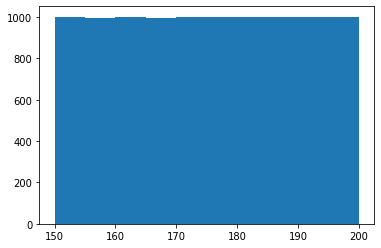

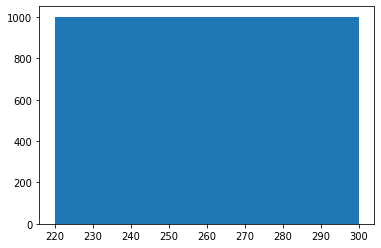

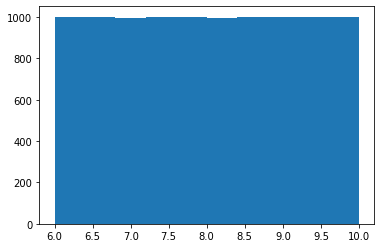

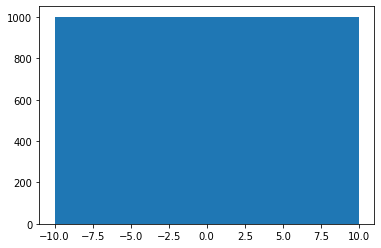

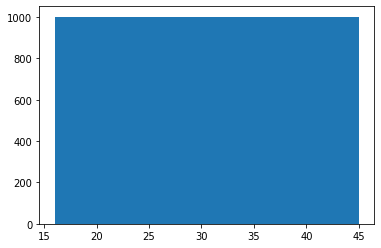

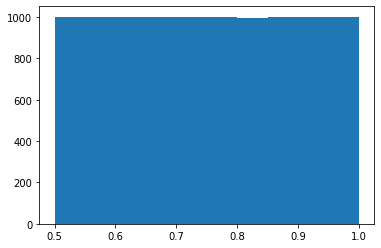

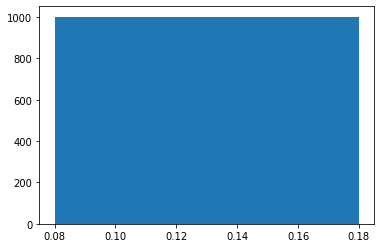

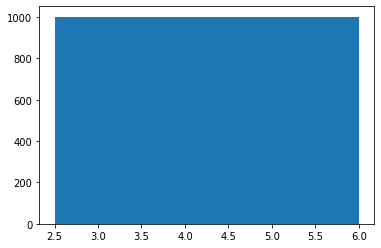

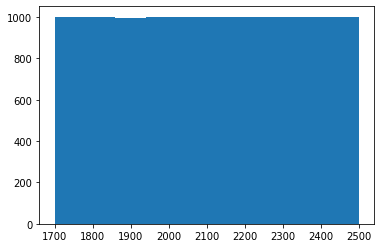

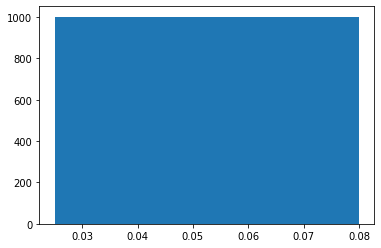

In [9]:
for i in range(Xh.shape[-1]):
    plt.hist(Xh[:,i])
    plt.show()

In [10]:
Xh[2,:]

array([1.74435335e+02, 2.47861013e+02, 7.38419080e+00, 1.45301700e+00,
       4.13140000e+01, 6.36849597e-01, 9.18409887e-02, 2.66198031e+00,
       1.82121656e+03, 6.03485566e-02])

In [11]:
wing_h(Xh[2,:].reshape(1,-1))

array([211.81740511])

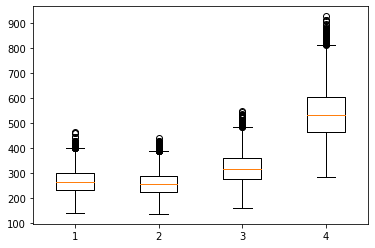

In [12]:
bx = plt.boxplot([yh, yl1, yl2, yl3])

In [13]:
np.min(yh)

140.9254221802795

In [14]:
min_value = 1000
for i in range(50):
    Xh, yh = wing_h(n = 1000000)
    min_value = np.min([np.min(yh), min_value])
    print(f'the minimum is {np.min(yh)} at {np.argmin(yh)}')
print(f'min_value is {min_value}')

the minimum is 132.48598383410746 at 802076
the minimum is 136.4643219223514 at 911968
the minimum is 136.63580295968728 at 796014
the minimum is 134.37306816720334 at 498893
the minimum is 134.66226262058922 at 159240
the minimum is 130.62537008035397 at 218137
the minimum is 135.79494650207593 at 814007
the minimum is 135.90384767214118 at 485816
the minimum is 129.34898753621886 at 762468
the minimum is 134.28490766556263 at 187630
the minimum is 133.42663709030745 at 73493
the minimum is 131.5877799097474 at 375368
the minimum is 131.75594905839657 at 224173
the minimum is 137.07523572845304 at 166098
the minimum is 135.29699492479048 at 637634
the minimum is 133.3493923548285 at 930371
the minimum is 136.90346548138007 at 301110
the minimum is 136.2085548809405 at 123987
the minimum is 132.2741728076808 at 413597
the minimum is 136.2710160290139 at 801025
the minimum is 137.01531050506514 at 164539
the minimum is 133.3476363003864 at 160340
the minimum is 134.95849640579223 at 390

In [15]:
from scipy.optimize import minimize, Bounds

In [16]:
Xh, yh = wing_h(n = 1000000)
Xh.shape

(1000000, 10)

In [17]:
l_bound = [150, 220, 6, -10, 16, 0.5, 0.08, 2.5, 1700, 0.025]
u_bound = [200, 300, 10, 10, 45, 1, 0.18, 6, 2500, 0.08]

In [18]:
bnds = Bounds(l_bound, u_bound)

In [19]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='Nelder-Mead', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.36052815912065 at [1.50001365e+02 2.28062001e+02 6.00136291e+00 1.41757032e+00
 1.60922415e+01 5.02846458e-01 1.79967011e-01 2.50000000e+00
 1.70000000e+03 2.50257636e-02]


In [20]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='L-BFGS-B', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.25367170097606 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -5.96099669e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]


In [21]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='SLSQP', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.25367317075384 at [ 1.50000000e+02  2.20000002e+02  6.00000000e+00 -2.50150584e-04
  1.60000007e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000002e+03  2.50000027e-02]


In [22]:
out = minimize(lambda x: wing_h(x), Xh[86,:].reshape(1,-1), method='Powell', tol=1e-6, bounds= bnds)
print(f'the minimum is {out.fun} at {out.x}')

the minimum is 123.25391171683845 at [1.50000001e+02 2.20000001e+02 6.00000248e+00 1.14528622e-06
 1.60000005e+01 5.00000370e-01 1.79999404e-01 2.50000038e+00
 1.70000000e+03 2.50005250e-02]


In [23]:
for i in range(10):
    out = minimize(lambda x: wing_h(x), Xh[np.random.randint(0,1000),:].reshape(1,-1), method='L-BFGS-B', tol=1e-6, bounds= bnds)
    print(f'the minimum is {out.fun} at {out.x}')


the minimum is 123.25367170103645 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -8.50963064e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the minimum is 123.25367170093963 at [ 1.50000000e+02  2.20000000e+02  6.00000000e+00 -3.64619074e-05
  1.60000000e+01  5.00000000e-01  1.80000000e-01  2.50000000e+00
  1.70000000e+03  2.50000000e-02]
the minimum is 123.2536717009648 at [1.50000000e+02 2.20000000e+02 6.00000000e+00 5.35262817e-05
 1.60000000e+01 5.00000000e-01 1.80000000e-01 2.50000000e+00
 1.70000000e+03 2.50000000e-02]
the minimum is 123.25367170093581 at [1.50000000e+02 2.20000000e+02 6.00000000e+00 3.31159982e-05
 1.60000000e+01 5.00000000e-01 1.80000000e-01 2.50000000e+00
 1.70000000e+03 2.50000000e-02]
the minimum is 123.25367170125459 at [1.50000000e+02 2.20000000e+02 6.00000000e+00 1.43372487e-04
 1.60000000e+01 5.00000000e-01 1.80000000e-01 2.50000000e+00
 1.70000000e+03 2.50000000e-02]
the minimum is 123.2536717

In [24]:
np.vstack([np.ones((5,3)), np.ones((5,3)), np.ones((5,3))])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [33]:
X_train, y_train = multi_fidelity_wing_gen({'h': 10000,'l1': 10000,'l2': 10000,'l3': 10000 })

In [26]:
X_train.shape

(40000, 11)

In [27]:
y_train.shape

(40000,)

In [28]:

from lmgp_pytorch.test_functions.multi_fidelity import  multi_fidelity_wing_gen, multi_fidelity_wing_value

In [29]:
X, y = multi_fidelity_wing_gen()

In [30]:
y

array([280.65986054, 266.48696481, 230.08394669, 252.14374994,
       216.60330282, 285.45003932, 238.65044931, 370.01904924,
       219.27627568, 307.53071424, 244.69304967, 324.92064932,
       284.97923566, 230.72466747, 231.13110948, 286.73711112,
       281.34427193, 222.25195793, 303.3629089 , 233.05419995,
       307.78644854, 234.0088905 , 234.46093128, 316.90546371,
       347.7653195 , 234.16982067, 197.52292587, 324.23592955,
       248.64095258, 229.00625257, 353.62562468, 217.47497644,
       278.78768786, 287.90860885, 243.95583462, 271.91695061,
       307.07598804, 205.60835489, 262.86576969, 269.08425753,
       342.73191978, 175.34554194, 249.82981487, 280.61855857,
       263.51805883, 311.59571225, 275.99904677, 240.24565714,
       278.89009695, 247.4711776 , 181.08296998, 295.34679318,
       307.44818309, 238.24823707, 350.04167577, 238.46476563,
       255.96051849, 212.27538801, 364.1830834 , 195.57936865,
       265.65332927, 252.23818128, 166.77136653, 344.12

In [31]:
y1 = multi_fidelity_wing_value(X)

In [38]:
X

array([[ 0.97893291,  1.37259342,  0.70145576, ..., -1.49127998,
         0.90659903,  0.        ],
       [-0.39833681, -0.64498404, -0.30026631, ...,  1.49032445,
        -1.72673511,  0.        ],
       [-1.43654263,  0.58002812,  1.14244046, ...,  0.82919582,
        -0.73918041,  0.        ],
       ...,
       [-0.39263896, -0.30958912, -1.54955256, ..., -1.5444564 ,
        -0.43227671,  3.        ],
       [-0.96120868,  1.54887963,  0.04915809, ..., -0.48158576,
        -1.0093163 ,  3.        ],
       [ 0.27309356, -1.22511069, -0.392863  , ...,  1.64508959,
         1.45593208,  3.        ]])

In [37]:
standard(X, quant_index=[0,1,2,3,4,5,6,7,8,9])

array([[ 0.97893291,  1.37259342,  0.70145576, ..., -1.49127998,
         0.90659903,  0.        ],
       [-0.39833681, -0.64498404, -0.30026631, ...,  1.49032445,
        -1.72673511,  0.        ],
       [-1.43654263,  0.58002812,  1.14244046, ...,  0.82919582,
        -0.73918041,  0.        ],
       ...,
       [-0.39263896, -0.30958912, -1.54955256, ..., -1.5444564 ,
        -0.43227671,  3.        ],
       [-0.96120868,  1.54887963,  0.04915809, ..., -0.48158576,
        -1.0093163 ,  3.        ],
       [ 0.27309356, -1.22511069, -0.392863  , ...,  1.64508959,
         1.45593208,  3.        ]])